In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util import *

In [17]:
df = load_df('data/dvf.csv')

- `raw`: 121546
- `dropna`: 121334 (-212)
- `dropna` et `>1000` : 118124 (-3210)
- `dropna`, `>1000` et `<1000000` : 116639 (95.96% du jeu de données initial)

In [32]:
df.head()

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,valeur_metre_carre
0,2021-462082,2021-02-19,1,Vente,175000.0,NaN,NaN,MANAOU,B063,31530,...,NaN,T,terres,NaN,NaN,7728.0,1.142513,43.727325,0000A,22.644928
1,2021-463574,2021-04-07,1,Vente,1.0,NaN,NaN,EMPERSEGUET,B050,31560,...,NaN,S,sols,NaN,NaN,156.0,NaN,NaN,000ZC,0.006410
2,2021-465610,2021-04-14,2,Vente,320299.0,NaN,NaN,SAPOU,B087,31330,...,NaN,T,terres,NaN,NaN,41486.0,1.242045,43.730923,000ZE,7.720653
3,2021-467501,2021-05-07,1,Vente,56500.0,NaN,NaN,ENJORS,B041,31480,...,NaN,T,terres,NaN,NaN,6443.0,0.972308,43.770244,0000H,8.769207
6,2021-472577,2021-07-22,1,Vente en l'état futur d'achèvement,252792.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.469088,43.660018,000AD,NaN


In [35]:
df.columns

Index(['id_mutation', 'date_mutation', 'numero_disposition', 'nature_mutation',
       'valeur_fonciere', 'adresse_numero', 'adresse_suffixe',
       'adresse_nom_voie', 'adresse_code_voie', 'code_postal', 'code_commune',
       'nom_commune', 'code_departement', 'ancien_code_commune',
       'ancien_nom_commune', 'id_parcelle', 'ancien_id_parcelle',
       'numero_volume', 'lot1_numero', 'lot1_surface_carrez', 'lot2_numero',
       'lot2_surface_carrez', 'lot3_numero', 'lot3_surface_carrez',
       'lot4_numero', 'lot4_surface_carrez', 'lot5_numero',
       'lot5_surface_carrez', 'nombre_lots', 'code_type_local', 'type_local',
       'surface_reelle_bati', 'nombre_pieces_principales',
       'code_nature_culture', 'nature_culture', 'code_nature_culture_speciale',
       'nature_culture_speciale', 'surface_terrain', 'longitude', 'latitude',
       'section_prefixe', 'valeur_metre_carre'],
      dtype='object')

In [40]:
df[['id_mutation', 'date_mutation', 'nom_commune', 'nature_mutation', 'valeur_fonciere', 'surface_terrain', 'surface_reelle_bati', 'valeur_metre_carre']]

,id_mutation,date_mutation,nom_commune,nature_mutation,valeur_fonciere,surface_terrain,surface_reelle_bati,valeur_metre_carre
0,2021-462082,2021-02-19,Thil,Vente,175000.0,7728.0,NaN,22.644928
1,2021-463574,2021-04-07,Nailloux,Vente,1.0,156.0,NaN,0.006410
2,2021-465610,2021-04-14,Larra,Vente,320299.0,41486.0,NaN,7.720653
3,2021-467501,2021-05-07,Brignemont,Vente,56500.0,6443.0,NaN,8.769207
6,2021-472577,2021-07-22,L'Union,Vente en l'état futur d'achèvement,252792.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
394983,2022-481351,2022-03-25,Puydaniel,Vente,84000.0,925.0,NaN,90.810811
394985,2022-481352,2022-04-14,Frouzins,Vente,45000.0,NaN,54.00,NaN
394986,2022-481353,2022-04-25,Saleich,Vente,2726.0,650.0,NaN,4.193846
394996,2022-481354,2022-04-22,Muret,Vente,135000.0,NaN,56.00,NaN


In [30]:
df[df['valeur_metre_carre'].isna()]

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude,section_prefixe,valeur_metre_carre
6,2021-472577,2021-07-22,1,Vente en l'état futur d'achèvement,252792.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.469088,43.660018,000AD,NaN
11,2021-473003,2021-07-23,1,Vente en l'état futur d'achèvement,335000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.409341,43.600846,844AC,NaN
18,2021-478825,2021-09-30,1,Vente en l'état futur d'achèvement,188500.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.000879,43.457706,000AM,NaN
109,2021-458401,2021-01-05,1,Vente,85000.0,28,B,RUE DES SALENQUES,8100,31000,...,1,NaN,NaN,NaN,NaN,NaN,1.438565,43.608378,826AD,NaN
110,2021-458402,2021-01-06,1,Vente,310000.0,23,NaN,ALL DES SYLPHES,0770,31520,...,4,NaN,NaN,NaN,NaN,NaN,1.480137,43.542887,000AO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394967,2022-481343,2022-04-13,1,Vente,58200.0,41,NaN,AV JEAN JAURES,0645,31110,...,2,NaN,NaN,NaN,NaN,NaN,0.585631,42.791978,000AH,NaN
394974,2022-481346,2022-04-28,1,Vente,120000.0,9,NaN,AV LEON BLUM,0089,31270,...,2,NaN,NaN,NaN,NaN,NaN,1.325934,43.523025,000AW,NaN
394979,2022-481349,2022-04-15,1,Vente,63000.0,37,NaN,AV JUSTIN PAGES,0142,31190,...,2,NaN,NaN,NaN,NaN,NaN,1.458735,43.351997,000AK,NaN
394985,2022-481352,2022-04-14,1,Vente,45000.0,2,NaN,RUE DU MIDI,0187,31270,...,0,NaN,NaN,NaN,NaN,NaN,1.334573,43.518958,000AY,NaN


In [18]:
df['valeur_fonciere']

0         175000.0
1              1.0
2         320299.0
3          56500.0
5              NaN
            ...   
394983     84000.0
394985     45000.0
394986      2726.0
394996    135000.0
394999    371000.0
Name: valeur_fonciere, Length: 121546, dtype: float64

In [19]:
df['valeur_fonciere'].dropna()

0         175000.0
1              1.0
2         320299.0
3          56500.0
6         252792.0
            ...   
394983     84000.0
394985     45000.0
394986      2726.0
394996    135000.0
394999    371000.0
Name: valeur_fonciere, Length: 121334, dtype: float64

In [20]:
df['valeur_fonciere'].dropna()[df['valeur_fonciere'] > 1000]

0         175000.0
2         320299.0
3          56500.0
6         252792.0
8         700000.0
            ...   
394983     84000.0
394985     45000.0
394986      2726.0
394996    135000.0
394999    371000.0
Name: valeur_fonciere, Length: 118124, dtype: float64

In [21]:
df['valeur_fonciere'].dropna()[df['valeur_fonciere'] > 1000][df['valeur_fonciere'] < 1000000]

0         175000.0
2         320299.0
3          56500.0
6         252792.0
8         700000.0
            ...   
394983     84000.0
394985     45000.0
394986      2726.0
394996    135000.0
394999    371000.0
Name: valeur_fonciere, Length: 116639, dtype: float64

In [22]:
ser = df['valeur_fonciere'].dropna()[df['valeur_fonciere'] > 1000][df['valeur_fonciere'] < 1000000]

<Axes: >

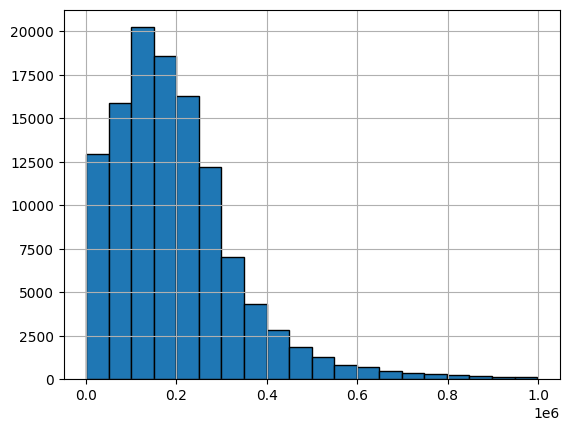

In [23]:
ser.hist(bins=20, edgecolor="black", linewidth=1)


In [24]:
df = df.dropna(subset=['valeur_fonciere'])

In [25]:
df['valeur_metre_carre']

0          22.644928
1           0.006410
2           7.720653
3           8.769207
6                NaN
             ...    
394983     90.810811
394985           NaN
394986      4.193846
394996           NaN
394999    978.891821
Name: valeur_metre_carre, Length: 121334, dtype: float64

In [26]:
df[df['nom_commune'] == 'Toulouse']['nature_culture'].dropna()

8                     sols
143                   sols
156                   sols
175                   sols
185                   sols
                ...       
375051                sols
375061    terrains a bâtir
375089    terrains a bâtir
375092                sols
375138                sols
Name: nature_culture, Length: 5033, dtype: object

In [27]:
df['nature_culture']

0                  terres
1                    sols
2                  terres
3                  terres
6                     NaN
               ...       
394983               sols
394985                NaN
394986    taillis simples
394996                NaN
394999               sols
Name: nature_culture, Length: 121334, dtype: object

In [28]:
df.loc[242571]

id_mutation                             2020-413349
date_mutation                   2020-01-02 00:00:00
numero_disposition                                2
nature_mutation                               Vente
valeur_fonciere                              1000.0
adresse_numero                                  NaN
adresse_suffixe                                 NaN
adresse_nom_voie                             VIATES
adresse_code_voie                              B048
code_postal                                   31210
code_commune                                  31426
nom_commune                      Pointis-de-Rivière
code_departement                                 31
ancien_code_commune                             NaN
ancien_nom_commune                              NaN
id_parcelle                          31426000ZC0029
ancien_id_parcelle                              NaN
numero_volume                                   NaN
lot1_numero                                     NaN
lot1_surface